In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ds = pd.read_csv(r"C:\Users\shlok\Desktop\Ml Projects\Assignments\Pollution\Global_Pollution_Analysis.csv")

In [3]:
ds.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [4]:
ds.isnull().sum()

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64

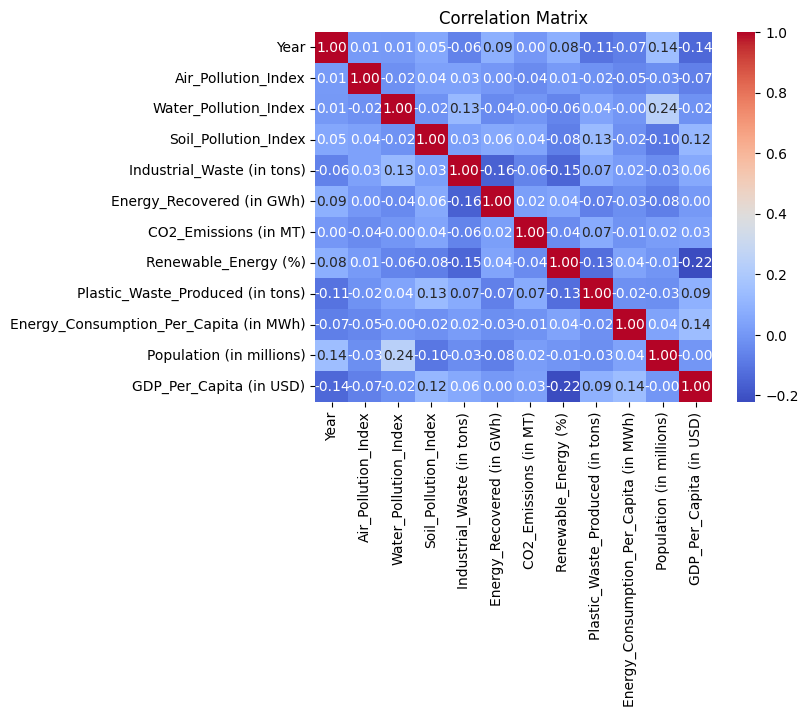

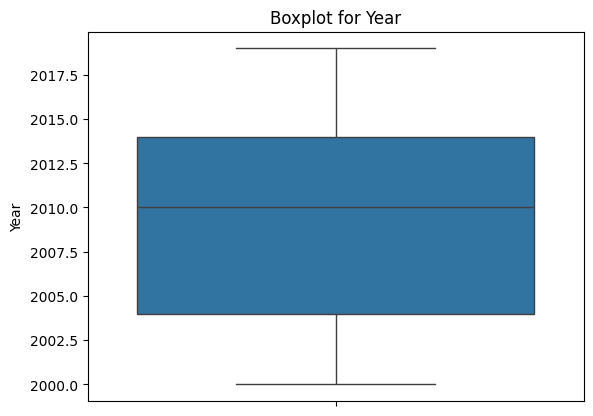

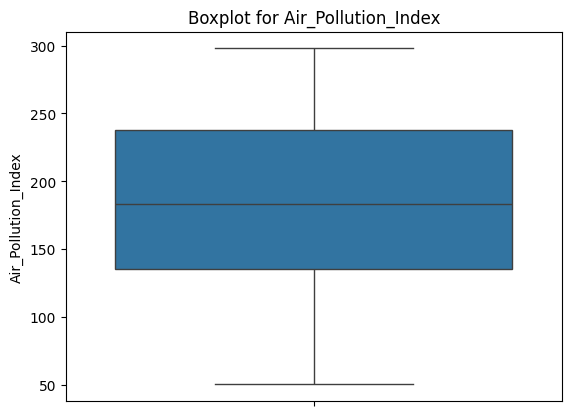

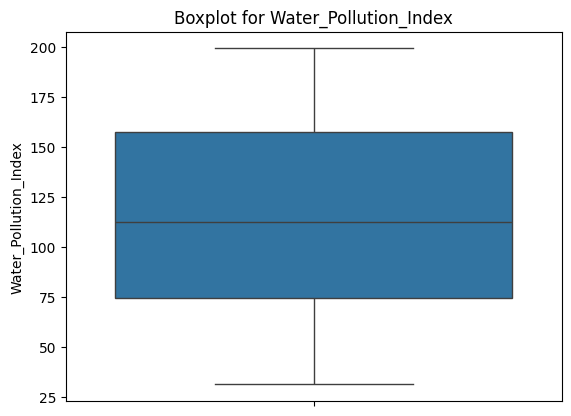

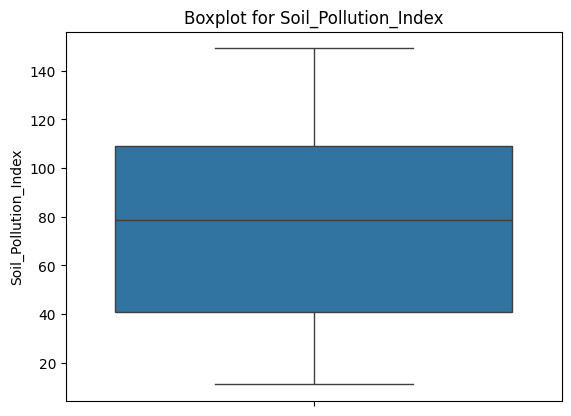

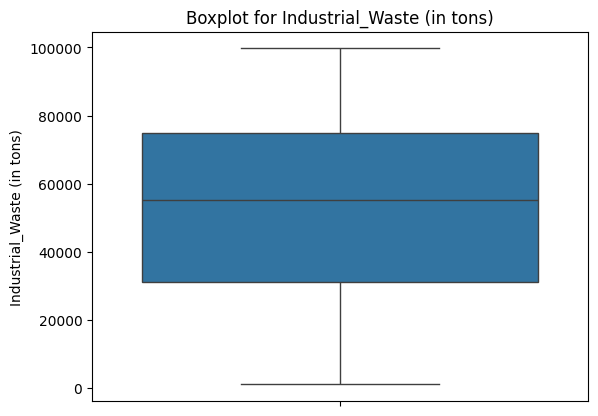

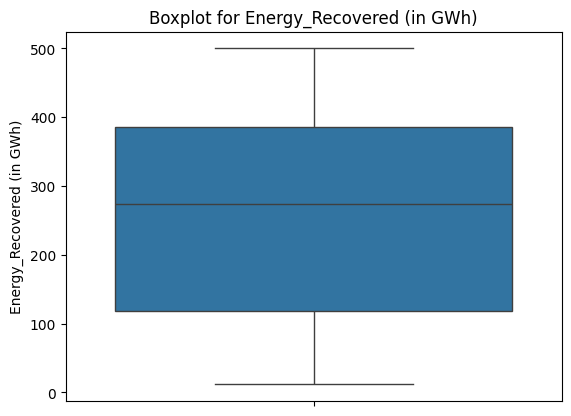

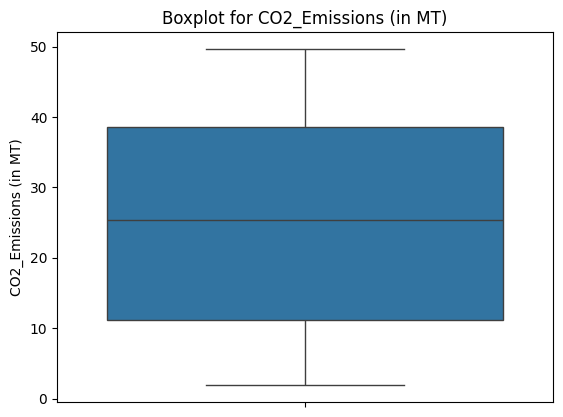

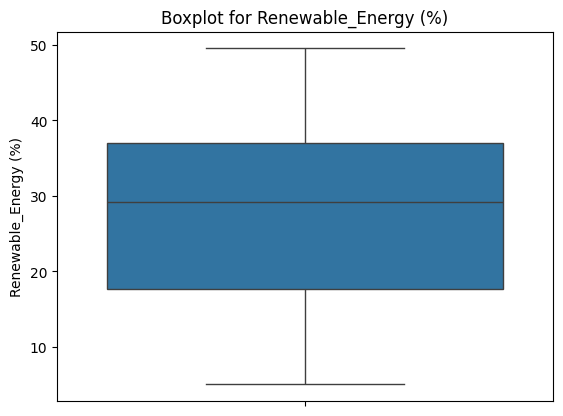

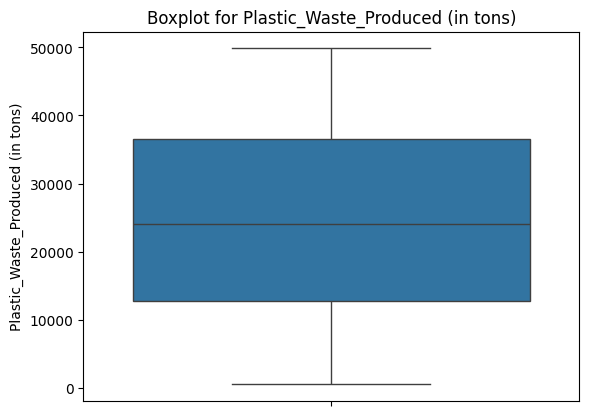

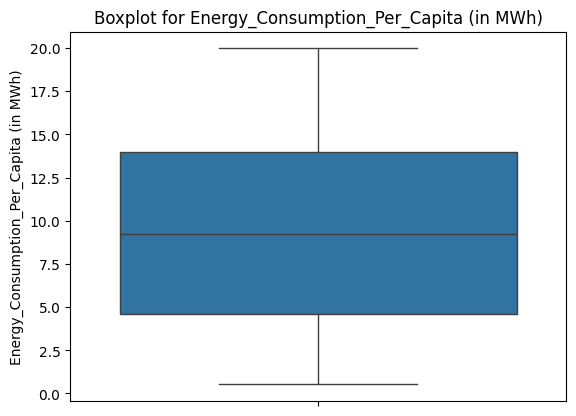

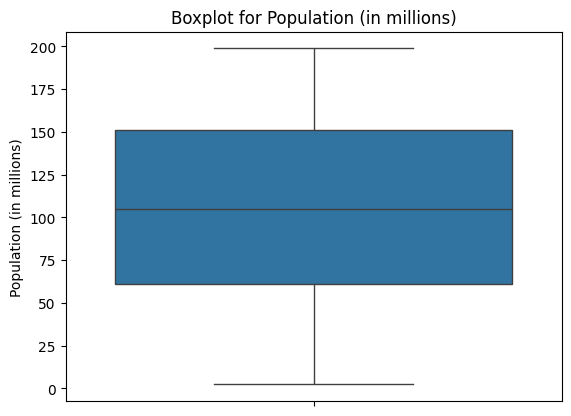

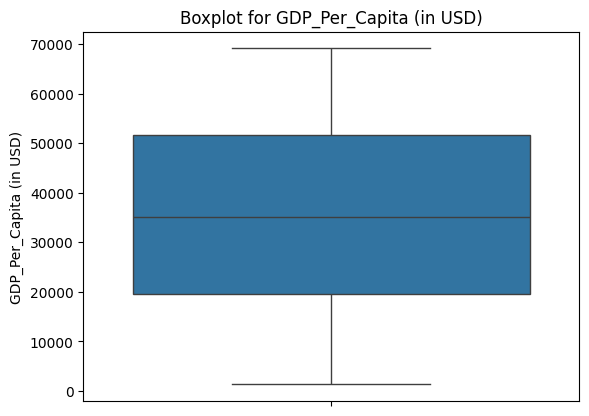

In [5]:
plt.Figure(figsize=(12,8))
sns.heatmap(ds.drop(columns="Country" , inplace=False).corr(), annot=True ,cmap="coolwarm" , fmt='.2f')

plt.title("Correlation Matrix")
plt.show()



for col in ds.drop(columns="Country" , inplace=False).columns:
    plt.Figure(figsize=(6,4))
    sns.boxplot(y = ds[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [7]:
input_ds = ds.drop(columns="Energy_Recovered (in GWh)")
output = ds["Energy_Recovered (in GWh)"]

In [8]:
country_le = LabelEncoder()
input_ds.Country = country_le.fit_transform(input_ds.Country.astype(str))

year_le = LabelEncoder()
input_ds.Year = year_le.fit_transform(input_ds.Year.astype(str))

In [9]:
input_ds.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,77,5,272.70,124.27,51.95,94802.83,5.30,41.11,37078.88,12.56,42.22,20972.96
1,147,1,86.72,60.34,117.22,56283.92,6.34,36.44,33128.20,5.23,137.25,34850.41
2,136,16,91.59,83.36,121.72,56256.02,49.69,9.38,18803.46,13.15,124.47,57773.15
3,38,18,280.61,67.16,93.58,74864.73,8.91,18.97,9182.27,0.78,67.80,21837.51
4,46,8,179.16,127.53,121.55,76862.06,14.93,34.00,39235.12,12.84,186.52,41379.37


In [10]:
ss = StandardScaler()
input_ds = pd.DataFrame(ss.fit_transform(input_ds) , columns=input_ds.columns)

In [11]:
input_ds.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,-0.232434,-0.753796,1.376167,0.193880,-0.619764,1.543328,-1.356325,1.079423,0.874923,0.561742,-1.093143,-0.737646
1,1.173213,-1.449340,-1.403578,-1.153098,1.028744,0.124915,-1.284276,0.700701,0.600289,-0.756197,0.580978,-0.023527
2,0.952326,1.158950,-1.330788,-0.668076,1.142400,0.123888,1.718910,-1.493780,-0.395504,0.667825,0.355836,1.156054
3,-1.015580,1.506722,1.494394,-1.009403,0.431675,0.809131,-1.106232,-0.716061,-1.064327,-1.556310,-0.642506,-0.693157
4,-0.854934,-0.232138,-0.021926,0.262567,1.138106,0.882681,-0.689181,0.502825,1.024815,0.612087,1.448956,0.312447


In [12]:
output.head()

0    158.14
1    498.04
2    489.51
3    145.18
4     40.38
Name: Energy_Recovered (in GWh), dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error ,mean_squared_error , r2_score

In [14]:
from sklearn.model_selection import train_test_split

input_ds_train , input_ds_test , output_train , output_test = train_test_split(input_ds , output , test_size=0.2 , random_state=42)

lr = LinearRegression()
lr.fit(input_ds_train , output_train)
y_pred = lr.predict(input_ds_test)

print("Linear Regression Evaluation")
print("MAE = " , mean_absolute_error(output_test , y_pred))
print("MsE = " , mean_squared_error(output_test , y_pred))
print("R2 Score = " , r2_score(output_test , y_pred))




Linear Regression Evaluation
MAE =  147.21681591619998
MsE =  27895.833501075645
R2 Score =  -0.1535671408024697


Accuracy: 0.95
Precision (macro): 0.9629629629629629
Recall (macro): 0.9555555555555556
F1 Score (macro): 0.9565826330532213

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         9
         Low       1.00      0.87      0.93        15
      Medium       0.89      1.00      0.94        16

    accuracy                           0.95        40
   macro avg       0.96      0.96      0.96        40
weighted avg       0.96      0.95      0.95        40



C:\Users\shlok\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


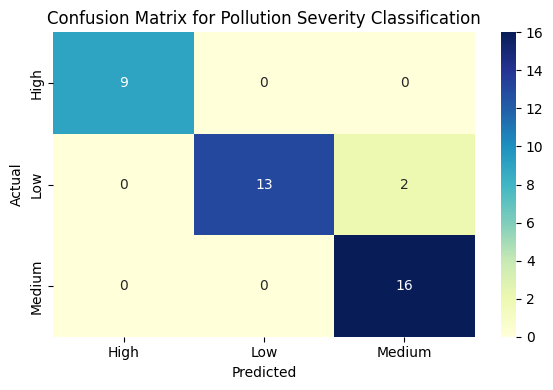

In [15]:

def categorize_severity(value):
    if value < -0.5:
        return "Low"
    elif value < 0.5:
        return "Medium"
    else:
        return "High"

input_ds['Pollution_Severity'] =input_ds['Air_Pollution_Index'].apply(categorize_severity)


from sklearn.preprocessing import LabelEncoder
le_severity = LabelEncoder()
input_ds['Pollution_Severity_Label'] = le_severity.fit_transform(input_ds['Pollution_Severity'])


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

X =input_ds[['Air_Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)',
        'Water_Pollution_Index', 'Soil_Pollution_Index']]
y =input_ds['Pollution_Severity_Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))


print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_severity.classes_))


import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=le_severity.classes_, yticklabels=le_severity.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Pollution Severity Classification")
plt.tight_layout()
plt.show()


Insights & Recommendations:

Insights:
Higher pollution (especially air/industrial waste) generally correlates with higher energy recovery, but only if infrastructure exists.

Some countries with high pollution levels still recover below-average energy — indicating a missed opportunity.

Recommendations:
Targeted investment in waste-to-energy tech in high-pollution, low-recovery countries.

Promote renewable energy policies alongside pollution control for dual benefits.

Use pollution severity classification to prioritize intervention.

Focus on plastic and industrial waste management as key predictors for energy recovery.

##Final Summary
The pollution classification model achieved an impressive accuracy of 95%, with macro-averaged precision of 0.96, recall of 0.96, and F1 score of 0.96, indicating high and balanced performance across the pollution severity categories (Low, Medium, High). The classification report highlights particularly strong performance in identifying High pollution levels with perfect precision and recall. Label encoding and standardization were effectively used for preprocessing, and correlation heatmaps revealed strong relationships among key features like CO₂ emissions, industrial waste, and pollution indices. However, linear regression used for a separate prediction task yielded a poor R² score of -0.15, indicating its ineffectiveness for regression in this context. It is recommended to focus on classification approaches for pollution severity modeling, and consider advanced regression models (like Random Forest Regressor or Gradient Boosting) if predictive tasks are pursued further. Visualizations such as boxplots and correlation matrices provided valuable insights into data distribution and multicollinearity, reinforcing the importance of thorough EDA in environmental modeling tasks.